In [ ]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm
from scipy.linalg import sqrtm

In [ ]:
n = 4

In [ ]:
x = cp.Variable(n)

p = np.array([.12, .10, .07, .03]) # generally, p is a random process measuring price differences
S = np.array([[.0064, .0008, -.0011, .0], [.0008, .0025, .0, .0], [-.0011, .0, .0004, .0],[.0, .0, .0, .0]]) # covariance matrix of return ts

mus = np.logspace(1, 7, num=100)
ret = list()
sd = list()
xvals = list()

In [ ]:
for mu in mus: 
  prob = cp.Problem(cp.Minimize(-p.T @ x + mu * cp.quad_form(x, S)), [cp.sum(x) == 1, x >= 0])
  prob.solve()
  xvals.append(x.value)
  ret.append(p.T @ x.value)
  sd.append(np.sqrt(x.value.T @ S @ x.value))

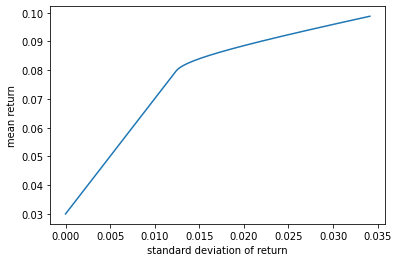

In [ ]:
plt.plot(sd, ret)
plt.ylabel('mean return')
plt.xlabel('standard deviation of return')
_ = plt.show()

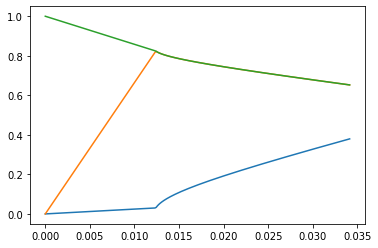

In [ ]:
plt.plot(sd, pd.DataFrame(xvals)[1])
plt.plot(sd, pd.DataFrame(xvals)[1]+pd.DataFrame(xvals)[2].T)
plt.plot(sd, pd.DataFrame(xvals)[1]+pd.DataFrame(xvals)[2]+pd.DataFrame(xvals)[3].T)

b)

In [ ]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm
from scipy.linalg import sqrtm

In [ ]:
etas = np.logspace(-4, -1, 100)
beta = .0
p = np.array([.12, .10, .07, .03])
S = np.array([[.0064, .0008, -.0011, .0], [.0008, .0025, .0, .0], [-.0011, .0, .0004, .0],[.0, .0, .0, .0]])
sqrtS = sqrtm(S)
y = cp.Variable(4)
rets = list()

In [ ]:
for eta in etas:
  prob = cp.Problem(cp.Maximize(p.T @ y), [p.T @ y + norm.ppf(eta)*cp.norm(sqrtS@y, 2) >= beta, cp.sum(y) == 1, y >= 0])
  prob.solve()
  rets.append(p.T @ y.value)

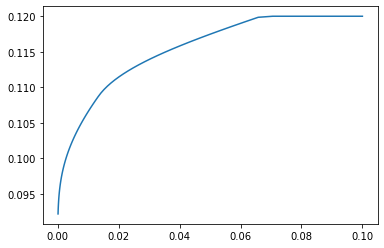

In [ ]:
plt.plot(etas, rets)